In [1]:
import numpy as np
import pandas as pd
import altair as alt
from time import time
from benchmark import forest_bench, forest_pca_bench, not_LA_bench
from helpers import printm
from PCA import CustomPCA
from plotter import plotter


ALLOWED = [0, 1]
LIMIT_COMPONENTS = 150

In [2]:
mnist = pd.read_csv("data/mnist.csv")
mnist_data, mnist_labels = mnist.drop(["label"], axis=1).values, mnist["label"]

In [3]:
handwritten = pd.read_csv("data/bin.csv")
handwritten_data, handwritten_labels = handwritten.drop(["label"], axis=1).values, handwritten["label"]

In [4]:
rocketbook = { 
    'data':  handwritten_data,
    'label': handwritten_labels
}

mnist = {
    'data': np.array([elm for ind, elm in enumerate(mnist_data) \
                      if mnist_labels[ind] in ALLOWED]),
    'label': [lbl for lbl in mnist_labels if lbl in ALLOWED]
}

In [5]:
print(f"MNIST dataset size:      {len(mnist['data'])}\n" +\
      f"Rocketbook dataset size: {len(rocketbook['data'])}")

MNIST dataset size:      12665
Rocketbook dataset size: 512


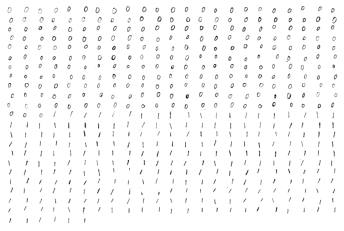

In [6]:
printm(rocketbook['data'])

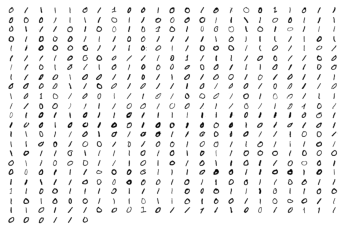

In [7]:
printm(mnist["data"][:len(rocketbook['data'])])

In [8]:
print(not_LA_bench(rocketbook))

Training time:            |  0
Testing time:             |  0.1587677001953125
Mean Absolute Error:      |  0.0
Mean Squared Error:       |  0.0
Root Mean Squared Error:  |  0.0
Accuracy:                 |  1.0


In [9]:
print(not_LA_bench(mnist))

Training time:            |  0
Testing time:             |  4.787524938583374
Mean Absolute Error:      |  0.12230556652191078
Mean Squared Error:       |  0.12230556652191078
Root Mean Squared Error:  |  0.34972212758404464
Accuracy:                 |  0.8776944334780892


In [10]:
print(forest_bench(mnist, rocketbook))

Training time:            |  3.4636240005493164
Testing time:             |  0.017462491989135742
Mean Absolute Error:      |  0.4921875
Mean Squared Error:       |  0.4921875
Root Mean Squared Error:  |  0.701560760020114
Accuracy:                 |  0.5078125


In [11]:
print(forest_bench(rocketbook, mnist))

Training time:            |  0.18391919136047363
Testing time:             |  0.20556426048278809
Mean Absolute Error:      |  0.0189498618239242
Mean Squared Error:       |  0.0189498618239242
Root Mean Squared Error:  |  0.1376584971003396
Accuracy:                 |  0.9810501381760758


In [14]:
data = [forest_pca_bench(CustomPCA, "from scratch", ind+1, rocketbook, mnist) 
        for ind in range(LIMIT_COMPONENTS)]

In [15]:
alt.renderers.enable('default'); plotter(data, "accuracy", ("Number of Components", "Accuracy", "PCAs"))

alt.LayerChart(...)

In [16]:
alt.renderers.enable('default'); plotter(data, "testing_time", ("Number of Components", "Time in seconds", "PCAs"))

alt.LayerChart(...)

In [17]:
alt.renderers.enable('default'); plotter(data, "training_time", ("Number of Components", "Time in seconds", "PCAs"))

alt.LayerChart(...)